In [3]:
import pandas as pd

/usr/local/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [4]:
df=pd.read_csv("ship.csv")

In [7]:
df.head()

In [8]:
# check the data info
df.info()

In [9]:
#check for missing values
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Gender           0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
# percentage of missing values
df.isna().sum()*100/df.shape[0]

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Gender          0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [15]:
# fill NAs in Age
df.Name.head()

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

In [16]:
name='Braund, Mr. Owen Harris'

In [17]:
name.split(",")

['Braund', ' Mr. Owen Harris']

In [18]:
name.split(",")[1]

' Mr. Owen Harris'

In [22]:
def extractTitle(name):
    return(name.split(",")[1].split(".")[0].strip())

In [23]:
# create a title
df['Title']=df.Name.apply(extractTitle)

In [25]:
df["Age"]=df.groupby("Title")["Age"].apply(lambda x:x.fillna(x.mean()))

In [27]:
# drop cabin
df.drop(columns="Cabin",inplace=True)

In [29]:
# drop rows where Embarked is missing
df.dropna(subset=["Embarked"],inplace=True)

In [30]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Gender         0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Title          0
dtype: int64

# Exploratory Data Analysis

In [31]:
from matplotlib import pyplot as plt, style
import seaborn as sns

/usr/local/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [32]:
style.use("ggplot")

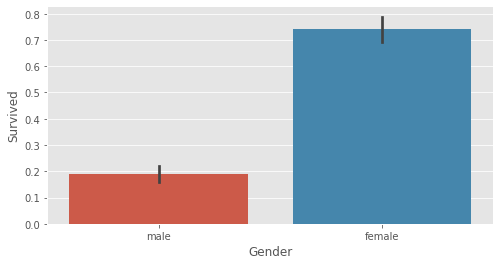

In [33]:
plt.figure(figsize=(8,4))
sns.barplot(data=df,x="Gender",y="Survived")
plt.show()

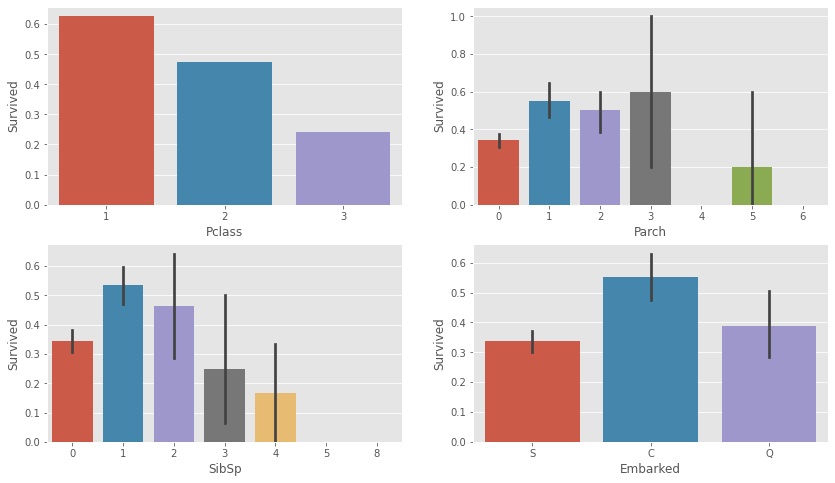

In [35]:
plt.figure(figsize=(14,8))
plt.subplot(2,2,1)
sns.barplot(data=df,x="Pclass",y="Survived",ci=False)
plt.subplot(2,2,2)
sns.barplot(data=df,x="Parch",y="Survived")
plt.subplot(2,2,3)
sns.barplot(data=df,x="SibSp",y="Survived")
plt.subplot(2,2,4)
sns.barplot(data=df,x="Embarked",y="Survived")
plt.show()

In [36]:
df.head(2)

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Mrs


In [37]:
# drop columns which are not significant
df.drop(columns=['PassengerId','Name','Ticket','Title'],inplace=True)

In [41]:
# create dummy variables
df_dummy=pd.get_dummies(data=df,columns=['Gender','Embarked'],drop_first=True)
df_dummy

,Survived,Pclass,Age,SibSp,Parch,Fare,Gender_male,Embarked_Q,Embarked_S
0,0,3,22.000000,1,0,7.2500,1,0,1
1,1,1,38.000000,1,0,71.2833,0,0,0
2,1,3,26.000000,0,0,7.9250,0,0,1
3,1,1,35.000000,1,0,53.1000,0,0,1
4,0,3,35.000000,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...,...
886,0,2,27.000000,0,0,13.0000,1,0,1
887,1,1,19.000000,0,0,30.0000,0,0,1
888,0,3,21.773973,1,2,23.4500,0,0,1
889,1,1,26.000000,0,0,30.0000,1,0,0


In [42]:
# split the data and standardise data
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

x=df_dummy.iloc[:,1:]
y=df_dummy.Survived
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0)

st=StandardScaler()
st.fit(x_train)

x_train_std=st.transform(x_train)
x_test_std=st.transform(x_test)

In [43]:
# build logistic regression model
from sklearn.linear_model import LogisticRegression

In [44]:
model=LogisticRegression()
model.fit(x_train_std,y_train)

LogisticRegression()

In [45]:
# check score
print("Train Score: ",model.score(x_train_std,y_train))
print("Test Score: ",model.score(x_test_std,y_test))

Train Score:  0.8243243243243243
Test Score:  0.757847533632287


In [47]:
# confusion matrix
y_train_pred=model.predict(x_train_std)
y_test_pred=model.predict(x_test_std)

In [48]:
pd.crosstab(y_train,y_train_pred)

col_0,0,1
Survived,,
0,369,48
1,69,180


In [49]:
(369+180)/x_train.shape[0]

0.8243243243243243

In [50]:
pd.crosstab(y_test,y_test_pred)

col_0,0,1
Survived,,
0,109,23
1,31,60


In [51]:
from sklearn.metrics import precision_score,recall_score,f1_score

In [52]:
precision_score(y_train,y_train_pred)

0.7894736842105263

In [53]:
recall_score(y_train,y_train_pred)

0.7228915662650602

In [54]:
precision_score(y_test,y_test_pred)

0.7228915662650602

In [55]:
recall_score(y_test,y_test_pred)

0.6593406593406593

In [59]:
import scikitplot

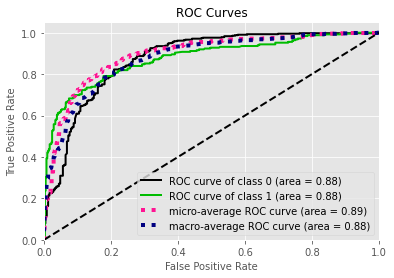

In [62]:
scikitplot.metrics.plot_roc(y_train,model.predict_proba(x_train_std))
plt.show()